<a href="https://colab.research.google.com/github/dmburns1729/Class-Files/blob/main/Copy_of_Neural_Network_Kaggle_Exercise__Test_Preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import heatmap
from sklearn import set_config
set_config(display='diagram')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from imblearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

from sklearn.compose import make_column_selector, make_column_transformer

#Sci-kit Learn
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

#Keras
from tensorflow.keras import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
# load data
from google.colab import drive
drive.mount('/content/drive')
filename = '/content/test (1).csv'
df = pd.read_csv(filename)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:

df.shape

(1459, 80)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

Preprocess the Train Test Data Set

In [ ]:
# copy
df_copy = df.copy()

In [ ]:
# check duplicates
df_copy.duplicated().sum()

0

In [ ]:
# check missing values
pd.set_option('display.max_rows', None)
df_copy.isna().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [ ]:
# Drop unique identifier
df_copy = df_copy.drop(columns={'Id'})

In [ ]:
# Drop columns with missing data >50%

df_copy = df_copy.drop(columns={'Alley', 'PoolQC', 'Fence', 'MiscFeature','Utilities'})

In [ ]:
df_copy.shape

(1459, 74)

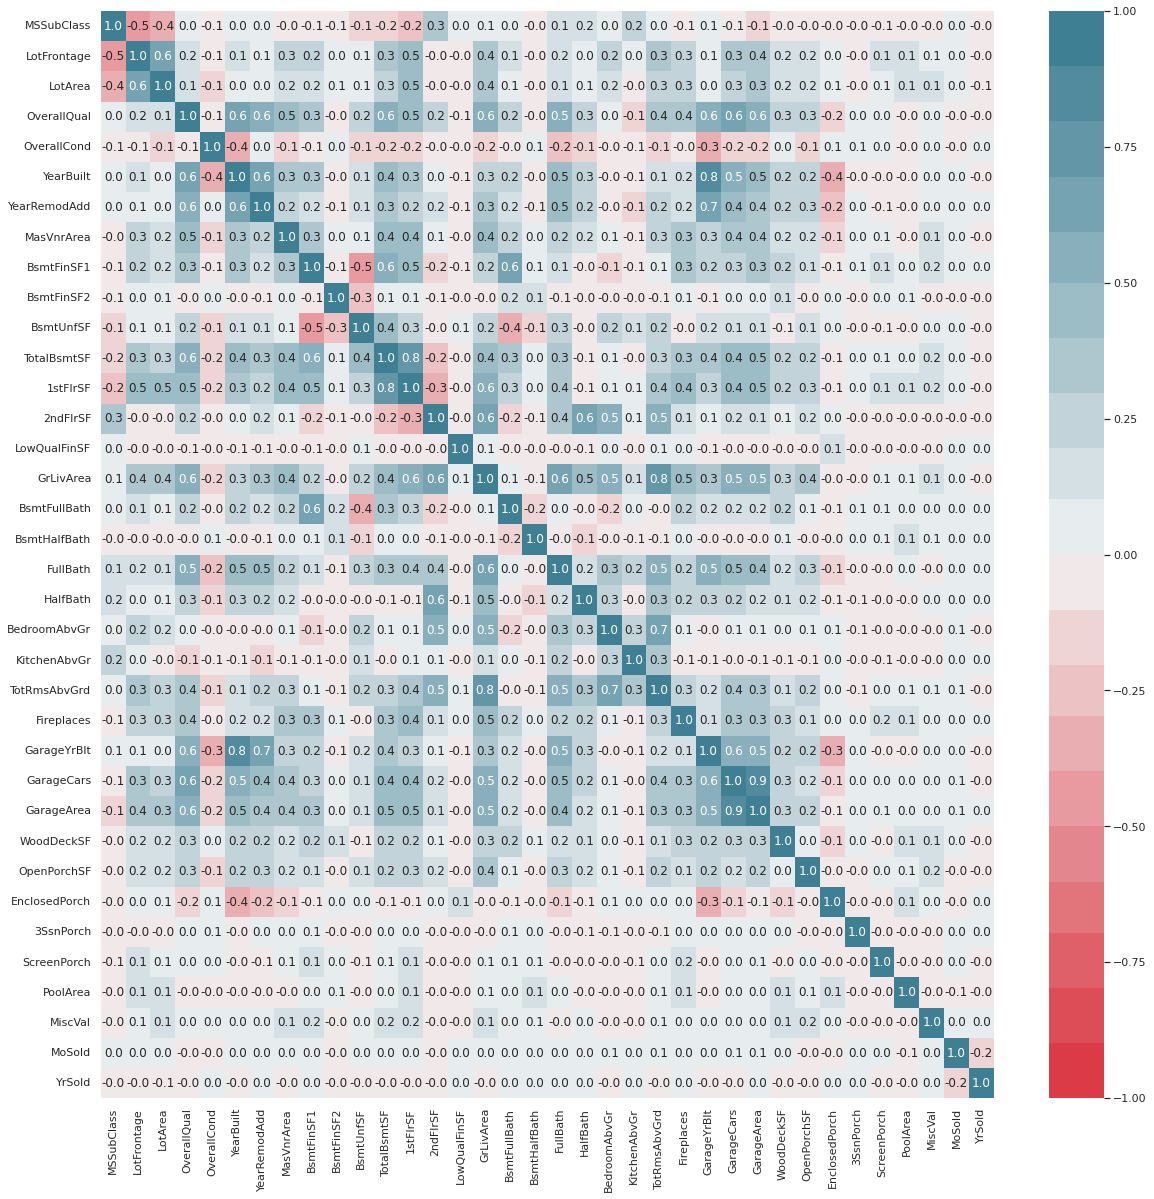

In [ ]:
corr = df_copy.corr()
plt.figure(figsize = (20,20));
sns.heatmap(corr, cmap=sns.diverging_palette(10, 220, n=20), annot = True, vmin=-1, vmax=1, center=0,fmt='.1f');

In [ ]:
df_copy['MasVnrType'].value_counts()

None       878
BrkFace    434
Stone      121
BrkCmn      10
Name: MasVnrType, dtype: int64

In [ ]:
df_copy['MasVnrType'].fillna('None', inplace=True)

In [ ]:
df_copy['MasVnrType'].value_counts()

None       894
BrkFace    434
Stone      121
BrkCmn      10
Name: MasVnrType, dtype: int64

In [ ]:
df_copy.shape

(1459, 74)

In [ ]:
df_copy['MasVnrArea'].value_counts()

0.0       877
176.0      10
144.0       9
120.0       8
216.0       8
200.0       7
302.0       6
504.0       6
198.0       6
128.0       6
60.0        5
210.0       5
203.0       5
260.0       5
140.0       5
196.0       5
164.0       5
256.0       5
180.0       4
174.0       4
20.0        4
16.0        4
186.0       4
44.0        4
194.0       4
240.0       4
112.0       4
232.0       4
178.0       4
50.0        4
340.0       4
40.0        4
88.0        4
150.0       4
306.0       4
143.0       4
242.0       4
23.0        4
420.0       4
450.0       3
68.0        3
190.0       3
108.0       3
270.0       3
130.0       3
145.0       3
513.0       3
52.0        3
182.0       3
206.0       3
456.0       3
76.0        3
132.0       3
280.0       3
252.0       3
264.0       3
126.0       3
90.0        3
96.0        3
162.0       3
170.0       3
32.0        3
80.0        3
248.0       3
172.0       3
98.0        3
72.0        3
14.0        3
300.0       3
218.0       2
568.0       2
156.0 

In [ ]:
df_copy['MasVnrArea'].fillna(0, inplace=True)

In [ ]:
df_copy['MasVnrArea'] = df_copy['MasVnrArea'].astype('int64')
df_copy['MasVnrArea'].value_counts()

0       892
176      10
144       9
120       8
216       8
200       7
302       6
504       6
198       6
128       6
60        5
210       5
203       5
260       5
140       5
196       5
164       5
256       5
180       4
174       4
20        4
16        4
186       4
44        4
194       4
240       4
112       4
232       4
178       4
50        4
340       4
40        4
88        4
150       4
306       4
143       4
242       4
23        4
420       4
450       3
68        3
190       3
108       3
270       3
130       3
145       3
513       3
52        3
182       3
206       3
456       3
76        3
132       3
280       3
252       3
264       3
126       3
90        3
96        3
162       3
170       3
32        3
80        3
248       3
172       3
98        3
72        3
14        3
300       3
218       2
568       2
156       2
51        2
492       2
136       2
212       2
123       2
161       2
480       2
352       2
1224      2
86        2
310       2
290 

In [ ]:
df_copy['BsmtQual'].value_counts()


TA    634
Gd    591
Ex    137
Fa     53
Name: BsmtQual, dtype: int64

In [ ]:
df_copy['BsmtQual'].fillna('None', inplace=True)
df_copy['BsmtCond'].fillna('None', inplace=True)
df_copy['BsmtExposure'].fillna('None', inplace=True)
df_copy['BsmtFinType1'].fillna('None', inplace=True)
df_copy['BsmtFinType2'].fillna('None', inplace=True)
df_copy['FireplaceQu'].fillna('None', inplace=True)

In [ ]:
df_copy['Electrical'] = df_copy['Electrical'].fillna(df_copy['Electrical'].value_counts().index[0])

In [ ]:
df_copy['Electrical'].value_counts()

SBrkr    1337
FuseA      94
FuseF      23
FuseP       5
Name: Electrical, dtype: int64

In [ ]:
df_copy['GarageType'].fillna('No Garage', inplace=True)
df_copy['GarageFinish'].fillna('No Garage', inplace=True)
df_copy['GarageQual'].fillna('No Garage', inplace=True)
df_copy['GarageCond'].fillna('No Garage', inplace=True)

In [ ]:
df_copy = df_copy.drop(columns={'GarageYrBlt'})

In [ ]:
#df_copy.dropna(inplace=True)
#df_copy = df_copy.drop(columns={'Longitude', 'Latitude'})

In [ ]:
# checking any inconsistent values
df_copy.describe(include= 'all')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,1459.000000,1455,1232.000000,1459.000000,1459,1459,1459,1459,1459,1459,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1458,1459
unique,NaN,5,NaN,NaN,2,4,4,5,3,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,6
top,NaN,RL,NaN,NaN,Pave,Reg,Lvl,Inside,Gtl,NAmes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WD,Normal
freq,NaN,1114,NaN,NaN,1453,934,1311,1081,1396,218,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1258,1204
mean,57.378341,NaN,68.580357,9819.161069,NaN,NaN,NaN,NaN,NaN,NaN,...,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705,NaN,NaN
std,42.746880,NaN,22.376841,4955.517327,NaN,NaN,NaN,NaN,NaN,NaN,...,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740,NaN,NaN
min,20.000000,NaN,21.000000,1470.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,NaN,NaN
25%,20.000000,NaN,58.000000,7391.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,NaN,NaN
50%,50.000000,NaN,67.000000,9399.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,NaN,NaN
75%,70.000000,NaN,80.000000,11517.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,NaN,NaN


In [ ]:
df_copy.shape

(1459, 73)

In [ ]:
# This for loop will check any inconsistent values in all columns

for col in df_copy:
    print(f'{col}:\n')
    print(df_copy[col].value_counts().head(20))
    print("\n\n")

MSSubClass:

20     543
60     276
50     143
120     95
30      70
70      68
160     65
80      60
90      57
190     31
85      28
75       7
180      7
45       6
40       2
150      1
Name: MSSubClass, dtype: int64



MSZoning:

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64



LotFrontage:

60.0    133
80.0     68
70.0     63
50.0     60
75.0     52
65.0     49
85.0     36
24.0     30
63.0     30
21.0     27
68.0     25
64.0     24
74.0     24
90.0     23
72.0     22
62.0     22
78.0     21
82.0     16
73.0     15
52.0     14
Name: LotFrontage, dtype: int64



LotArea:

9600     20
7200     18
6000     17
9000     15
7500     12
10800    11
6240     10
7000      9
6120      9
1680      8
10320     7
9750      7
8000      7
8400      7
10400     6
8640      6
2280      6
8750      5
5400      5
9350      5
Name: LotArea, dtype: int64



Street:

Pave    1453
Grvl       6
Name: Street, dtype: int64



LotShape:

Reg    9

In [ ]:
df_copy['MSSubClass'] = df_copy['MSSubClass'].astype('object')


In [ ]:
# This for loop will check valuecounts in object columns
# This is causing problems with OHE of the test data

for col in df_copy.select_dtypes('object'):
    print(f'{col}:\n')
    print(df_copy[col].value_counts())
    print("\n\n")

MSSubClass:

20     543
60     276
50     143
120     95
30      70
70      68
160     65
80      60
90      57
190     31
85      28
75       7
180      7
45       6
40       2
150      1
Name: MSSubClass, dtype: int64



MSZoning:

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64



Street:

Pave    1453
Grvl       6
Name: Street, dtype: int64



LotShape:

Reg    934
IR1    484
IR2     35
IR3      6
Name: LotShape, dtype: int64



LandContour:

Lvl    1311
HLS      70
Bnk      54
Low      24
Name: LandContour, dtype: int64



LotConfig:

Inside     1081
Corner      248
CulDSac      82
FR2          38
FR3          10
Name: LotConfig, dtype: int64



LandSlope:

Gtl    1396
Mod      60
Sev       3
Name: LandSlope, dtype: int64



Neighborhood:

NAmes      218
OldTown    126
CollgCr    117
Somerst     96
Edwards     94
NridgHt     89
Gilbert     86
Sawyer      77
SawyerW     66
Mitchel     65
NWAmes      58
IDOTRR      56
Craw

In [ ]:
!pip install dython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from dython.nominal import associations


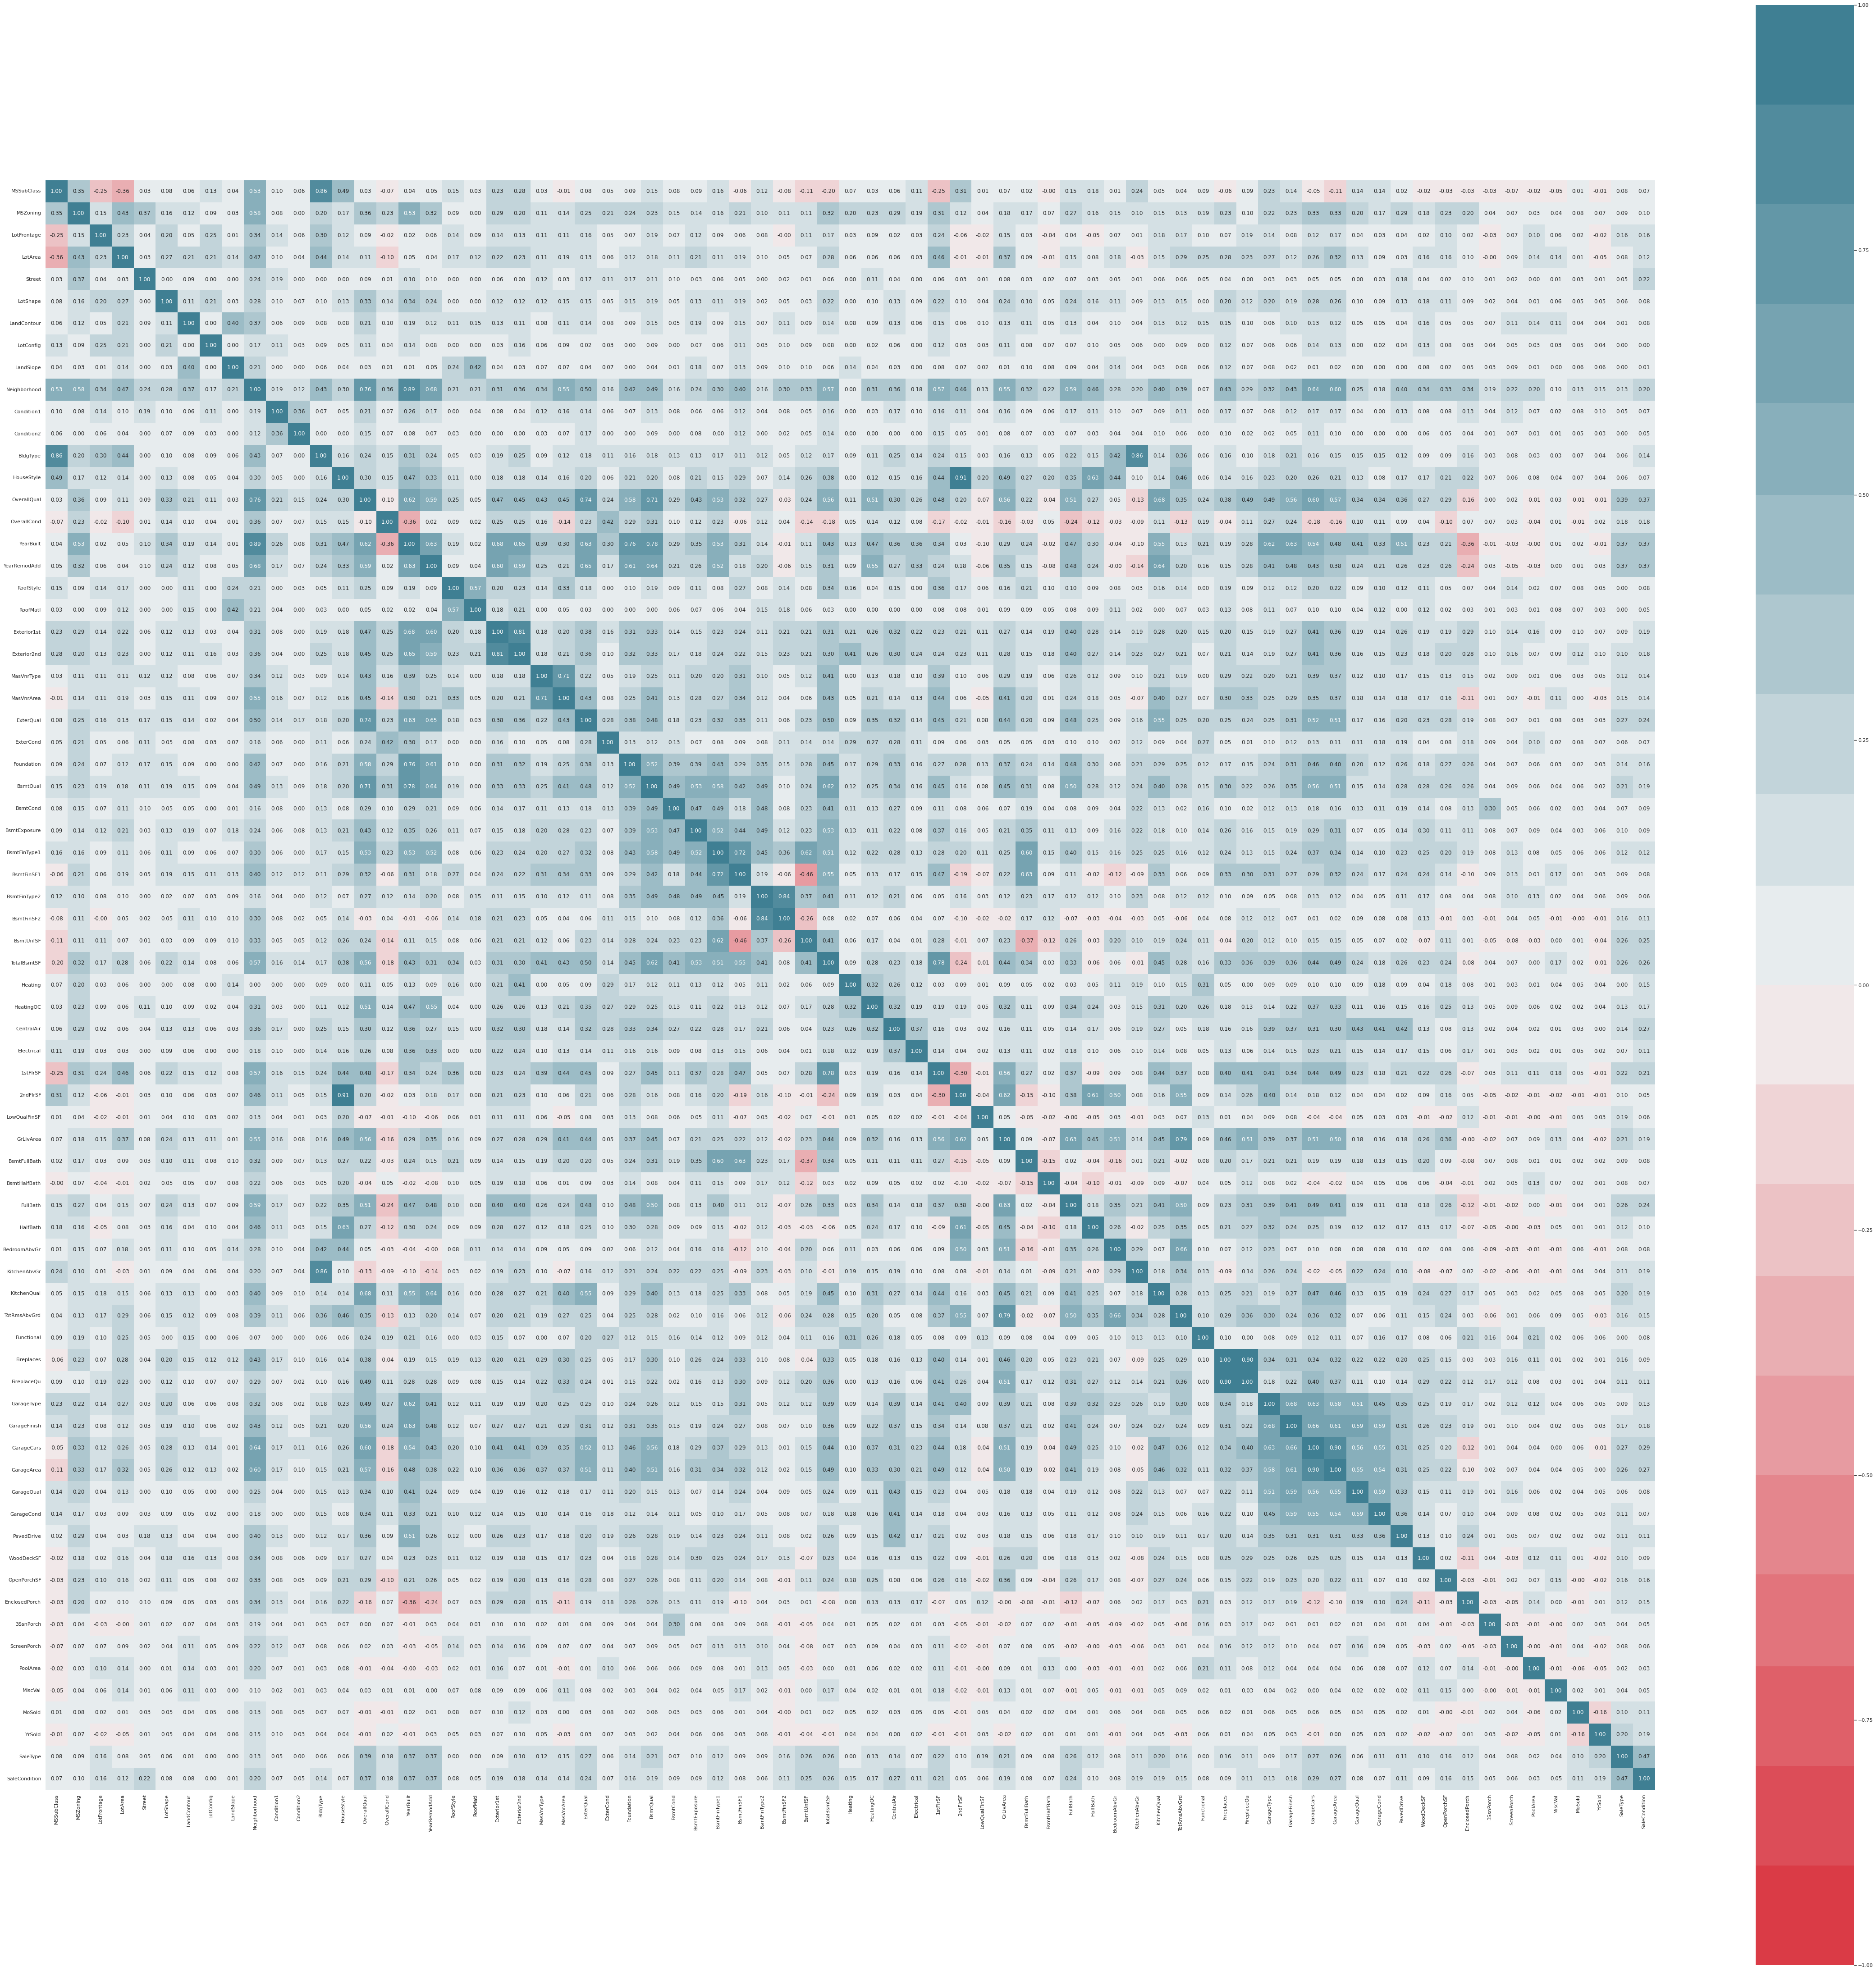

In [ ]:
# Explore correlations
associations(df_copy, figsize=(80,80),fmt='.2f', vmin=-1, vmax=1,cmap=sns.diverging_palette(10, 220, n=20));


In [ ]:
# I will drop some of the large value categorical columns with low correlation to sale price that will junk up the columns after OHE

df_copy = df_copy.drop(columns={'MSSubClass','Street', 'LandSlope', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', '3SsnPorch','MiscVal' })


In [ ]:
# This for loop will check valuecounts in object columns
# This is causing problems with OHE of the test data

for col in df_copy.select_dtypes('object'):
    print(f'{col}:\n')
    print(df_copy[col].value_counts())
    print("\n\n")

MSZoning:

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64



LotShape:

Reg    934
IR1    484
IR2     35
IR3      6
Name: LotShape, dtype: int64



LandContour:

Lvl    1311
HLS      70
Bnk      54
Low      24
Name: LandContour, dtype: int64



LotConfig:

Inside     1081
Corner      248
CulDSac      82
FR2          38
FR3          10
Name: LotConfig, dtype: int64



Neighborhood:

NAmes      218
OldTown    126
CollgCr    117
Somerst     96
Edwards     94
NridgHt     89
Gilbert     86
Sawyer      77
SawyerW     66
Mitchel     65
NWAmes      58
IDOTRR      56
Crawfor     52
BrkSide     50
Timber      34
NoRidge     30
StoneBr     26
SWISU       23
MeadowV     20
ClearCr     16
BrDale      14
NPkVill     14
Veenker     13
Blmngtn     11
Blueste      8
Name: Neighborhood, dtype: int64



Condition1:

Norm      1251
Feedr       83
Artery      44
RRAn        24
PosN        20
RRAe        17
PosA        12
RRNe         4
RRNn     

In [ ]:
df_copy.shape

(1459, 64)

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1455 non-null   object 
 1   LotFrontage    1232 non-null   float64
 2   LotArea        1459 non-null   int64  
 3   LotShape       1459 non-null   object 
 4   LandContour    1459 non-null   object 
 5   LotConfig      1459 non-null   object 
 6   Neighborhood   1459 non-null   object 
 7   Condition1     1459 non-null   object 
 8   Condition2     1459 non-null   object 
 9   BldgType       1459 non-null   object 
 10  HouseStyle     1459 non-null   object 
 11  OverallQual    1459 non-null   int64  
 12  YearBuilt      1459 non-null   int64  
 13  YearRemodAdd   1459 non-null   int64  
 14  RoofStyle      1459 non-null   object 
 15  RoofMatl       1459 non-null   object 
 16  Exterior1st    1458 non-null   object 
 17  Exterior2nd    1458 non-null   object 
 18  MasVnrTy


 LotArea 



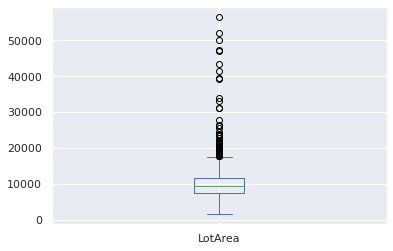


 OverallQual 



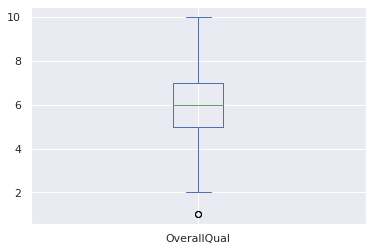


 YearBuilt 



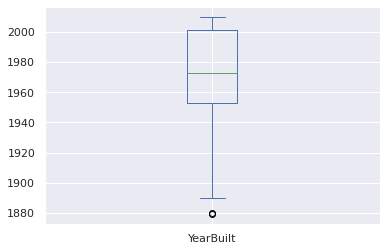


 YearRemodAdd 



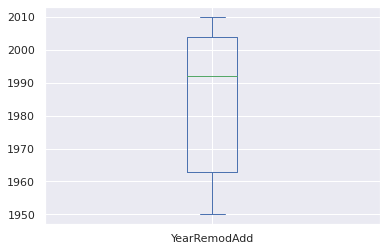


 MasVnrArea 



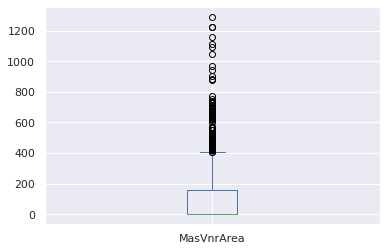


 1stFlrSF 



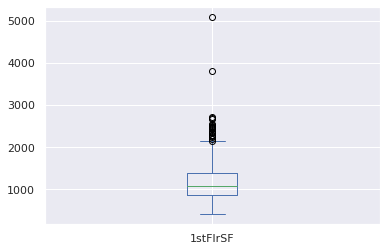


 2ndFlrSF 



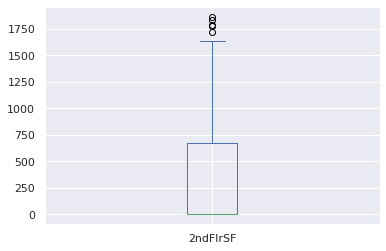


 GrLivArea 



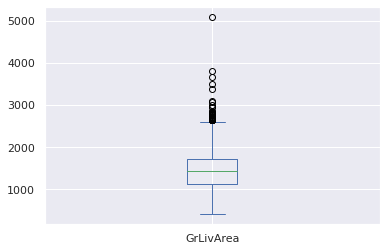


 FullBath 



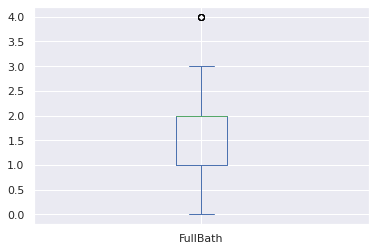


 HalfBath 



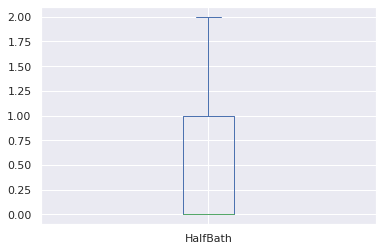


 BedroomAbvGr 



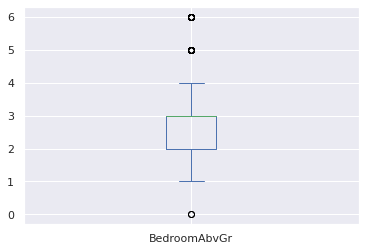


 KitchenAbvGr 



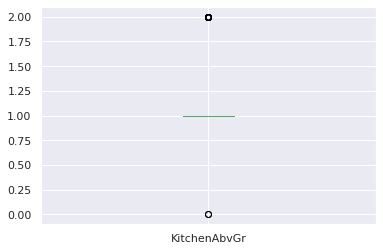


 TotRmsAbvGrd 



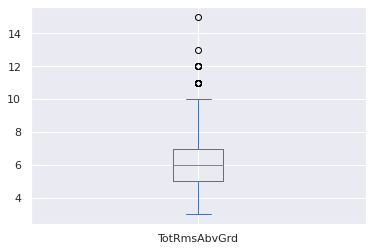


 Fireplaces 



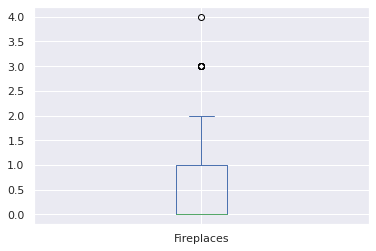


 WoodDeckSF 



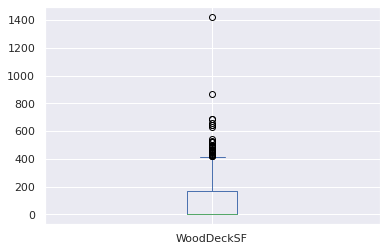


 OpenPorchSF 



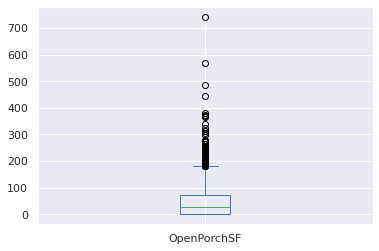


 EnclosedPorch 



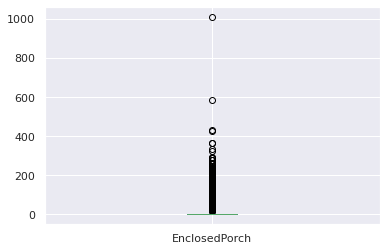


 ScreenPorch 



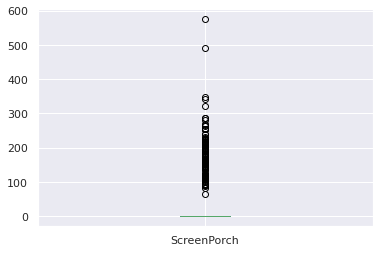


 PoolArea 



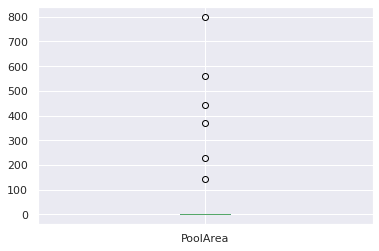


 MoSold 



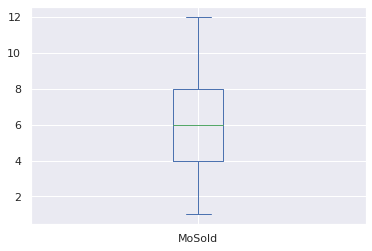


 YrSold 



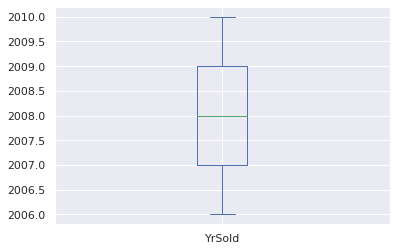

CPU times: user 3.62 s, sys: 1.76 s, total: 5.38 s
Wall time: 3.92 s


In [ ]:
# # explore numeric distributions via boxplots to see outliers
%%time
for col in df_copy.select_dtypes('int64'):
  print('\n', col, '\n')
  df_copy[col].plot(kind='box')
  plt.show()

In [ ]:
print("Number of rows in the data:", df_copy.shape[0])
print("Number of columns in the data:", df_copy.shape[1])

Number of rows in the data: 1459
Number of columns in the data: 64


In [ ]:
# Eliminate outliers
# Comment out elimination of outliers for the Kaggle test set

#df_copy = df_copy.loc[df_copy['LotArea'] <= 25000,:]
#df_copy = df_copy.loc[df_copy['SalePrice'] <= 500000,:]
#df_copy = df_copy.loc[df_copy['BsmtFinSF1'] <= 2000,:]
#df_copy = df_copy.loc[df_copy['MasVnrArea'] <= 1200,:]
#df_copy = df_copy.loc[df_copy['TotalBsmtSF'] <= 3000,:]
#df_copy = df_copy.loc[df_copy['1stFlrSF'] <= 2500,:]
#df_copy = df_copy.loc[df_copy['GrLivArea'] <= 4000,:]

# Don't eliminate outliers in LotFrontage until after imputing values
#df_copy = df_copy.loc[df_copy['LotFrontage'] <= 160,:]



print("Number of rows in the data:", df_copy.shape[0])
print("Number of columns in the data:", df_copy.shape[1])


Number of rows in the data: 1459
Number of columns in the data: 64



 LotArea 



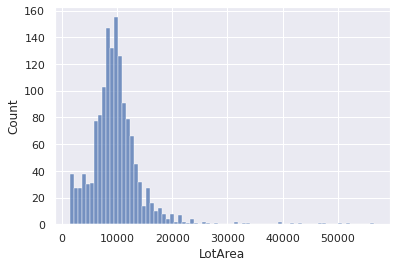


 OverallQual 



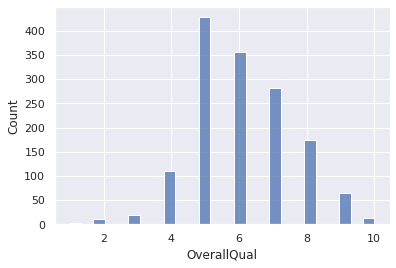


 YearBuilt 



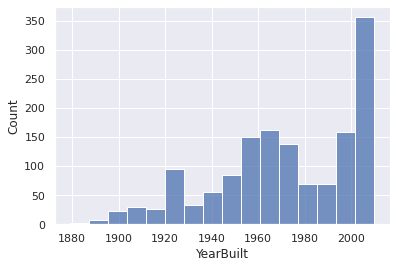


 YearRemodAdd 



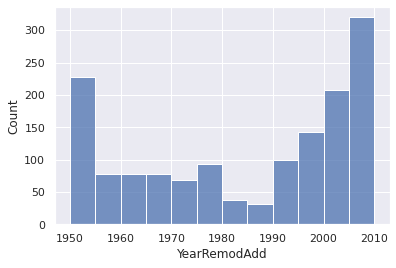


 MasVnrArea 



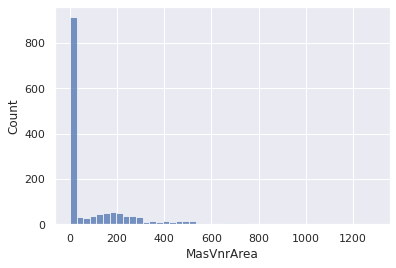


 1stFlrSF 



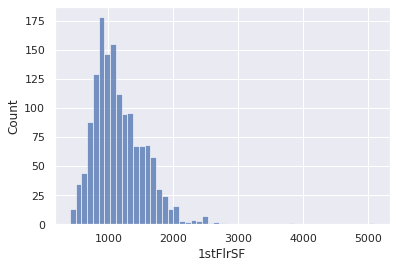


 2ndFlrSF 



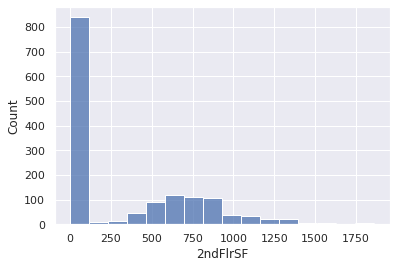


 GrLivArea 



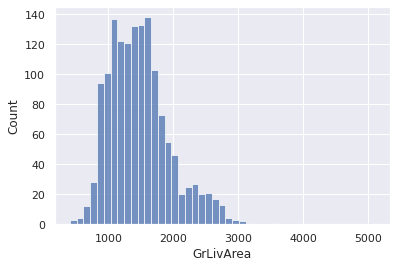


 FullBath 



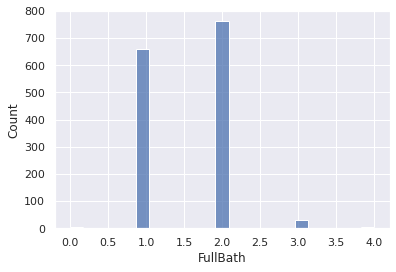


 HalfBath 



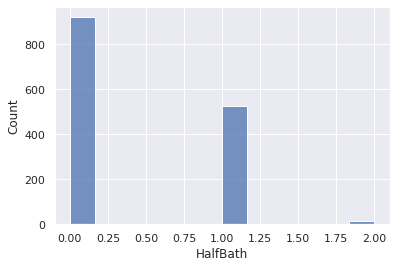


 BedroomAbvGr 



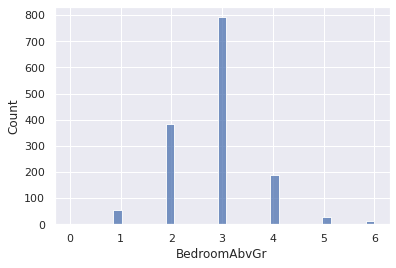


 KitchenAbvGr 



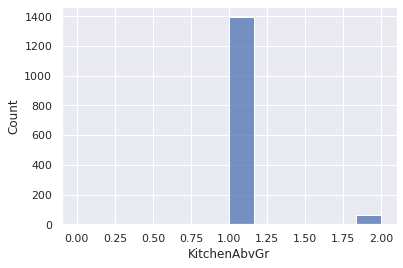


 TotRmsAbvGrd 



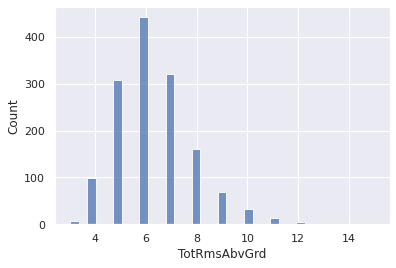


 Fireplaces 



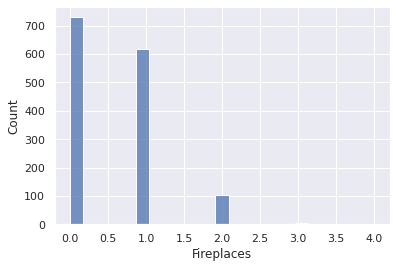


 WoodDeckSF 



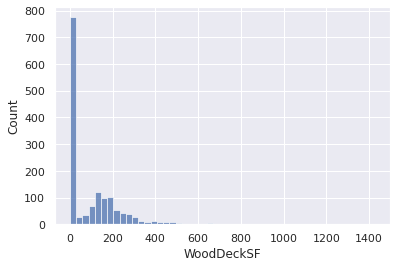


 OpenPorchSF 



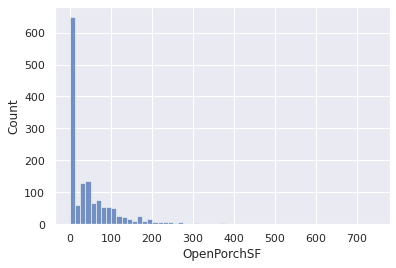


 EnclosedPorch 



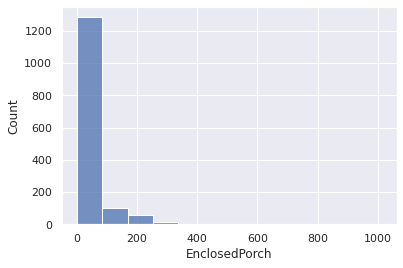


 ScreenPorch 



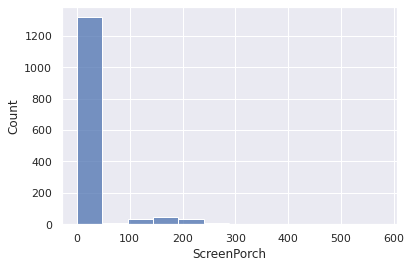


 PoolArea 



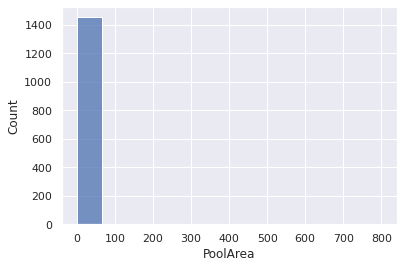


 MoSold 



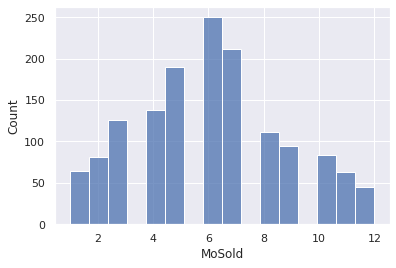


 YrSold 



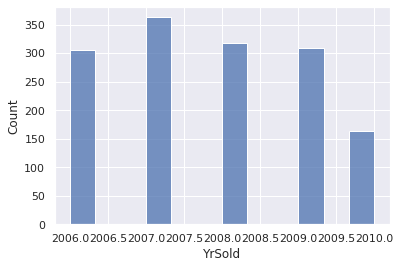

CPU times: user 8.53 s, sys: 1.33 s, total: 9.87 s
Wall time: 12 s


In [ ]:
%%time
for col in df_copy.select_dtypes('int64'):
  print('\n', col, '\n')
  sns.set(style="darkgrid")
  sns.histplot(data=df_copy, x=col, palette="ch:.10");
  plt.show()

There are a lot out outliers here!  I will run everything with the outliers then decide if I need to do something about them.  It looks like they are not accidential so I may try to use some data engineering.

There are also a lot of rows that have a lot of zeros. In fact, I think that many of these should be binary not features like they are listed. That is, if there is a porch that should be yes/no.  Square footage doesn't seem to add much value.

In [ ]:
df_copy['BathroomTotCount'] = df_copy['BsmtFullBath'] + df_copy['FullBath'] + df_copy['HalfBath']# + df_copy['BsmtHalfBath']

df_copy['BathroomBedroomRatio'] = df_copy['BathroomTotCount'] / df_copy['BedroomAbvGr']
df_copy['BathroomBedroomRatio'].value_counts()

1.000000    450
0.666667    331
0.500000    191
0.333333    130
1.500000    100
1.333333     92
0.750000     56
2.000000     40
3.000000     22
0.400000     11
0.250000      9
0.600000      8
0.800000      5
1.666667      4
1.250000      3
2.500000      2
inf           2
4.000000      1
Name: BathroomBedroomRatio, dtype: int64

In [ ]:
print("Number of rows in the data:", df_copy.shape[0])
print("Number of columns in the data:", df_copy.shape[1])

Number of rows in the data: 1459
Number of columns in the data: 66


In [ ]:
# Replace infinite updated data with nan
df_copy.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN

# For training data I dropped all NaN values but here I will replace them

df_copy['BathroomBedroomRatio'].fillna(df_copy['BathroomBedroomRatio'].max(), inplace=True)



#df_copy.dropna(inplace=True)

In [ ]:
print("Number of rows in the data:", df_copy.shape[0])
print("Number of columns in the data:", df_copy.shape[1])

Number of rows in the data: 1459
Number of columns in the data: 66


In [ ]:
df_copy['BathroomBedroomRatio'].value_counts()

1.000000    450
0.666667    331
0.500000    191
0.333333    130
1.500000    100
1.333333     92
0.750000     56
2.000000     40
3.000000     22
0.400000     11
0.250000      9
0.600000      8
0.800000      5
4.000000      5
1.666667      4
1.250000      3
2.500000      2
Name: BathroomBedroomRatio, dtype: int64

## Visualization

In [ ]:
#Comment out visualization based on price

#%%time
#for col in df_copy.select_dtypes('number'):
#  print('\n', col, '\n')
#  sns.regplot(data=df_copy,
#                x=col,
#                y='SalePrice',
#                x_ci='ci',
#                ci=99,
#                marker='.',
#                scatter_kws={"color": "black"},
#                line_kws={"color": "red"},
#                ax=None);
#  plt.show()


In [ ]:
#df_copy['MSSubClass'] = df_copy['MSSubClass'].astype('object')


# Machine Learning

In [ ]:
df_copy.isna().sum()

MSZoning                  4
LotFrontage             227
LotArea                   0
LotShape                  0
LandContour               0
LotConfig                 0
Neighborhood              0
Condition1                0
Condition2                0
BldgType                  0
HouseStyle                0
OverallQual               0
YearBuilt                 0
YearRemodAdd              0
RoofStyle                 0
RoofMatl                  0
Exterior1st               1
Exterior2nd               1
MasVnrType                0
MasVnrArea                0
ExterQual                 0
ExterCond                 0
Foundation                0
BsmtQual                  0
BsmtCond                  0
BsmtExposure              0
BsmtFinType1              0
BsmtFinSF1                1
BsmtFinType2              0
BsmtUnfSF                 1
TotalBsmtSF               1
Heating                   0
HeatingQC                 0
CentralAir                0
Electrical                0
1stFlrSF            

In [ ]:
df_ml = df_copy.copy()

# Deleting all X, y train but imputing LotFrontage

In [ ]:
# Loop through index values of the dataframe
# Will need to fill with this formula AFTER test, train split

def fill_LotFrontage(data_frame, fill_data):

  for ind in data_frame.index:

    x = data_frame.loc[ind, 'LotFrontage']

    if np.isnan(x) == True:

      # Impute LotFrontage based on average of sqauare root of Lot Area and 1stFlrSF estimators

      ratio_area_est = data_frame['LotFrontage'] / (data_frame['LotArea']) ** (1/2)
      area_est = ratio_area_est.mean() * data_frame.loc[ind, 'LotArea'] ** (1/2)
#      print(area_est)

      ratio_first_est = data_frame['LotFrontage'] / (data_frame['1stFlrSF']) ** (1/2)
      first_est = ratio_first_est.mean() * data_frame.loc[ind, '1stFlrSF'] ** (1/2)
#      print(first_est)

      frontage_est = round((area_est + first_est) / 2,0)
      frontage_est = int(frontage_est)
#      print(frontage_est)

      data_frame.loc[ind, 'LotFrontage'] = int(frontage_est)

      data_frame.loc[ind, 'LotFrontage'] = int(data_frame.loc[ind, 'LotFrontage'])

#      print(data_frame.loc[ind, 'LotFrontage'])
#      print("\n")

In [ ]:
df_ml.isna().sum()

MSZoning                  4
LotFrontage             227
LotArea                   0
LotShape                  0
LandContour               0
LotConfig                 0
Neighborhood              0
Condition1                0
Condition2                0
BldgType                  0
HouseStyle                0
OverallQual               0
YearBuilt                 0
YearRemodAdd              0
RoofStyle                 0
RoofMatl                  0
Exterior1st               1
Exterior2nd               1
MasVnrType                0
MasVnrArea                0
ExterQual                 0
ExterCond                 0
Foundation                0
BsmtQual                  0
BsmtCond                  0
BsmtExposure              0
BsmtFinType1              0
BsmtFinSF1                1
BsmtFinType2              0
BsmtUnfSF                 1
TotalBsmtSF               1
Heating                   0
HeatingQC                 0
CentralAir                0
Electrical                0
1stFlrSF            

In [ ]:
fill_LotFrontage(df_ml,df_ml)


In [ ]:
df_copy.shape

(1459, 66)

In [ ]:
df_ml.to_csv('Kaggle_Test.csv', index=False)